Enzo Walker

# Part I - PCA

In [55]:
# Import necessary Python modules
...
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [56]:
# Load diabetes data with Pandas
...

diabetes_data = pd.read_csv('diabetes.csv')

# Show the first five rows
print(diabetes_data.shape)
diabetes_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
# Drop NAs
...
diabetes_data.dropna(inplace=True)
diabetes_data.shape

print(diabetes_data.shape)
diabetes_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [60]:
# Create X, y - Outcome is the target
...

X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

print(X.shape)
X.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [61]:
# Feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Split the data to train and test with a ratio of 0.3 for test set
...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
# Create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1400, max_depth=220, max_features='auto')

In [65]:
from sklearn.model_selection import cross_val_score

# Perform a 10-fold cross validation with 'roc_auc' as scoring - CV should be on the whole dataset
rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='roc_auc')

# print the cv_score mean
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.8301908831908831


In [66]:

# Fit the rf_clf on the training set
...
rf_clf.fit(X_train, y_train)
# Get feature_importances for all features using random forest classifier
...
importances = rf_clf.feature_importances_

In [67]:
print(importances)

[0.08407577 0.26701571 0.0900989  0.07332885 0.0724106  0.15498818
 0.12321996 0.13486202]


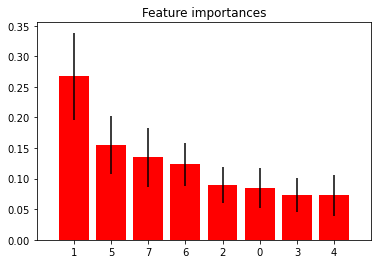

In [68]:
# Plot impurity
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

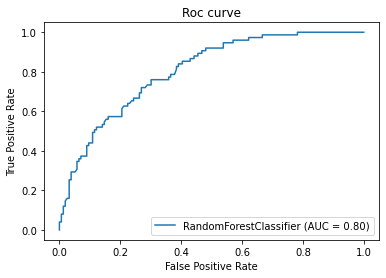

In [69]:
# Plot the complete ROC
from sklearn import metrics
...
metrics.plot_roc_curve(rf_clf, X_test, y_test)
plt.title("Roc curve")
plt.show()

In [92]:
# Create a pca with 4 principal components, and apply it on X and store the transformed data in X4D
from sklearn import decomposition
...

pca = decomposition.PCA(n_components=4)
X4D = pca.fit_transform(X)

print(X4D.shape)

(768, 4)


In [93]:
X4D[0]

array([-75.71465491, -35.95078264,  -7.26078895,  15.66926931])

In [94]:
# Check the pca components
pca.components_.T[:,0]

array([-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,  6.07566861e-02,
        9.93110844e-01,  1.40108085e-02,  5.37167919e-04, -3.56474430e-03])

In [73]:

# Split the X4D to train and test
...

X4D_train, X4D_test, y_train, y_test = train_test_split(X4D, y, test_size=0.30)

print(X4D_train.shape)
print(y_train.shape)
print(X4D_test.shape)
print(y_test.shape)

(537, 4)
(537,)
(231, 4)
(231,)


In [74]:
pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC-1,-0.002022,0.097812,0.016093,0.060757,0.993111,0.014011,0.000537,-0.003565
PC-2,-0.022649,-0.972210,-0.141909,0.057861,0.094627,-0.046973,-0.000817,-0.140168
PC-3,-0.022465,0.143429,-0.922467,-0.307013,0.020977,-0.132445,-0.000640,-0.125454
PC-4,-0.049046,0.119830,-0.262743,0.884369,-0.065550,0.192802,0.002699,-0.301024


In [75]:
pca.explained_variance_ratio_

array([0.88854663, 0.06159078, 0.02579012, 0.01308614])

Text(0, 0.5, 'Cumulative Explained Varianve')

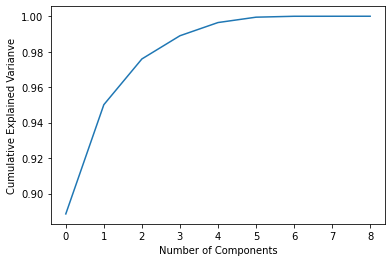

In [91]:
# Graph how much of the total 8 dimensional  variance is within the first N components.

from sklearn.decomposition import PCA
pca2 = PCA().fit(diabetes_data)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Varianve')

In [46]:
# Write all the necessary code to answer Q3 on comparing different number of PCs (1 to 4).
# You should compare based on mean cv score using 'roc_auc' as scoring and 10 fold cv
...

# 4 Components
rf_clf.fit(X4D, y)
rf_cv_score_X4D = cross_val_score(rf_clf, X4D, y, cv=10, scoring='roc_auc')

# 3 Components
pca = decomposition.PCA(n_components=3)
X3D = pca.fit_transform(X)
rf_clf.fit(X3D, y)
rf_cv_score_X3D = cross_val_score(rf_clf, X3D, y, cv=10, scoring='roc_auc')


# 2 Components
pca = decomposition.PCA(n_components=2)
X2D = pca.fit_transform(X)
rf_clf.fit(X2D, y)
rf_cv_score_X2D = cross_val_score(rf_clf, X2D, y, cv=10, scoring='roc_auc')

# 1 Component
pca = decomposition.PCA(n_components=1)
X1D = pca.fit_transform(X)
rf_clf.fit(X1D, y)
rf_cv_score_X1D = cross_val_score(rf_clf, X1D, y, cv=10, scoring='roc_auc')

print(rf_cv_score_X4D.mean())
print(rf_cv_score_X3D.mean())
print(rf_cv_score_X2D.mean())
print(rf_cv_score_X1D.mean())

0.7711638176638175
0.7684529914529914
0.7547421652421653
0.6634002849002849


# Part II - Image Segmentation with K-Means and GMM

(192, 263, 3)


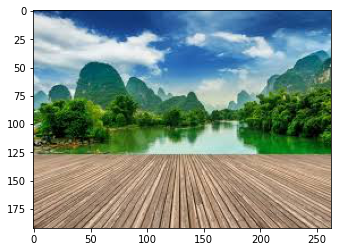

In [167]:
# Load pic - Don't forget to include matplotlib in the 1st cell at the top of the notebook!
pic = plt.imread('pic.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [168]:
# Reshape the pic to make it a 2D array
pic_array = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_array.shape

(50496, 3)

In [169]:
# Import K-Means
from sklearn.cluster import KMeans

In [170]:
# 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_array)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

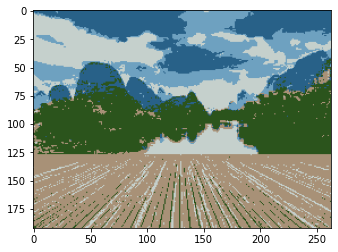

In [171]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

(300, 444, 3)


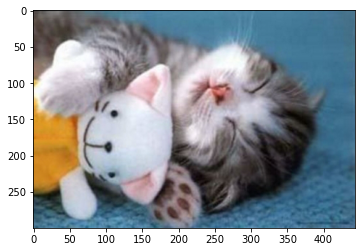

In [172]:

cat = plt.imread('cat.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(cat.shape)
plt.imshow(cat)

In [173]:
# Reshape cat to make it a 2D array 
...

cat_array = cat.reshape(cat.shape[0]*cat.shape[1], cat.shape[2])
cat_array.shape

(133200, 3)

In [174]:

# Apply K-Means algorithms on the cat image with 5 clusters/segments,
# and display the segmented image
...

kmeans = KMeans(n_clusters=5, random_state=0).fit(cat_array)
cat2show = kmeans.cluster_centers_[kmeans.labels_]

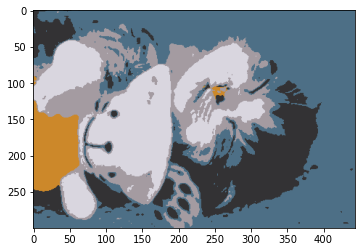

In [175]:
cluster_cat = cat2show.reshape(cat.shape[0], cat.shape[1], cat.shape[2])
plt.imshow(cluster_cat)